# Data Processing Approach for Portfolio Project

## Project Title: Data Processing and Analysis for Academic Performance Prediction

## Student Name: Guled Hassan

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   1. Data Sources
     - Data Source 1: Academic dataset representing students’ performance, collected through internal surveys from university records. (https://archive.ics.uci.edu/dataset/320/student+performance)
     - Data Source 2: Economic indicators (GDP, unemployment rate, inflation rate) obtained from publicly available World Bank databases. (https://data.worldbank.org/)
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

      - Data Aggregation: Aggregation was not required as each source provided self-contained, complementary data. However, merging was necessary to integrate socioeconomic features with academic performance records.



In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display basic information
print("First few rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

First few rows of the dataset:
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  



2. **Data Format Transformation:**
   - Describe the current format of the data.

     - The dataset is provided in CSV format

   - Outline the planned transformation to a unified format suitable for analysis and modeling.

    - Loading Data:

    a) Load the dataset into a Pandas DataFrame from the CSV format.

    B) Use pd.read_csv() to read the data.

    - Verifying Data Types:

    a) Check and ensure columns have appropriate data types:

       I) Numerical columns (e.g., 'Unemployment rate', 'GDP') should be float or int.

       II ) Categorical columns should be category or object.
   
    - Handling Missing Values:

    a) Handle missing values:

      I) For numerical columns, replace missing values with the median or mean.

     II) Drop rows with critical missing values (e.g., missing target variable).
  
     - Encoding Categorical Variables:

    a) Convert categorical variables into numeric formats:
      I) Use one-hot encoding for nominal variables.

     II) Use label encoding for ordinal variables.
     
    - Scaling/Normalizing Numerical Data:

   a) Standardize numerical features to have a mean of 0 and a standard deviation of 1.

   b) Use StandardScaler to scale features like 'Unemployment rate', 'GDP'.
    
  - Saving the Transformed Dataset:

     a) Save the processed DataFrame into a CSV or other suitable format for modeling.

    b) Use df_encoded.to_csv() to save the transformed dataset for future use.


3. **Data Exploration:**
   - Enumerate the features included in the dataset.

**Features Included in the Dataset:**
 - List of features (columns) in the dataset
   
   a) Unemployment rate
  
   b) GDP

   c) income

   d) target

   e) education level
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
     
  **Distributions of Features:**

   **1:Unemployment Rate:**
The distribution may reveal if the rate is skewed or evenly distributed, suggesting that normalization or transformation is required.

  **2:GDP:**
If skewness is found in the GDP distribution, log transformation can be necessary to normalize the data.

  **3:Target Variable:**
The target variable's distribution would assist in determining whether the model requires any modifications, such as addressing imbalances.

**Correlation Analysis**


**1: Unemployment Rate and goal:** The unemployment rate may be a significant predictor of the goal variable if there is a significant positive or negative connection between the two variables.

**2: GDP and Target:** If changes in GDP have a direct impact on the target, it can be determined by looking at the correlation between GDP and the target variable. These properties may be quite relevant for modeling, according to strong relationships.

**Outliers:**

**1:GDP with unemployment rate:** Boxplots or Z-scores can be used to identify outliers. It could be necessary to eliminate or cap these outliers in order to address them.

**2:Target Variable:** Results or model performance may be impacted by outliers in the target variable. Finding them would make it easier to determine if they should be changed or eliminated.

   
  


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

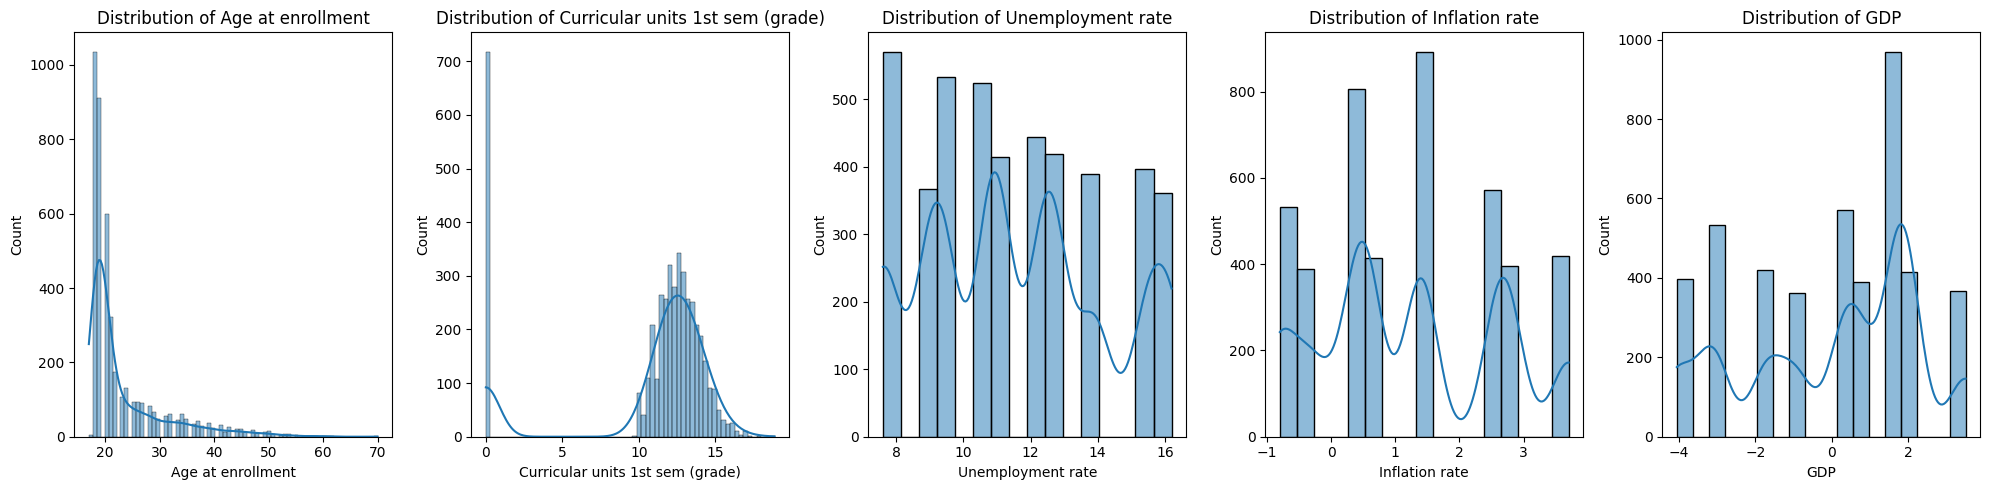

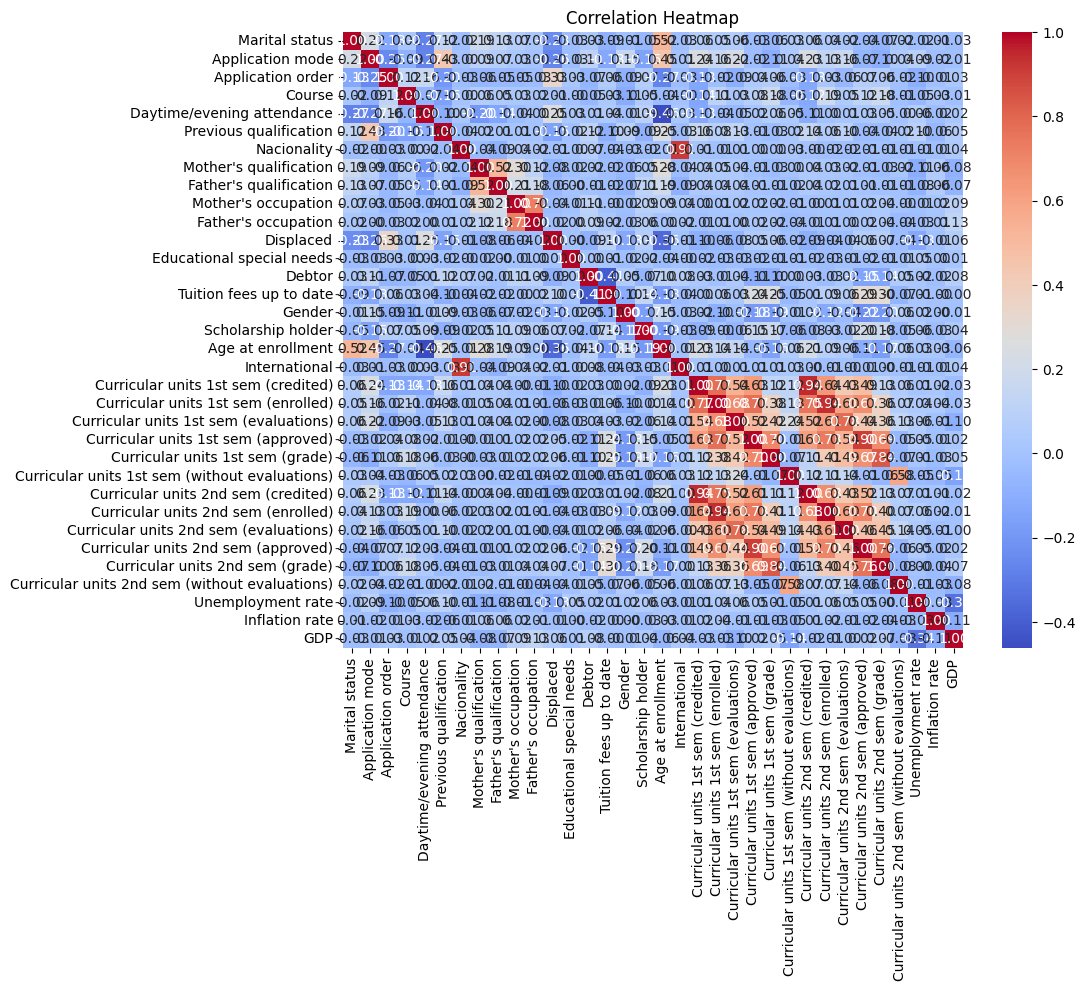

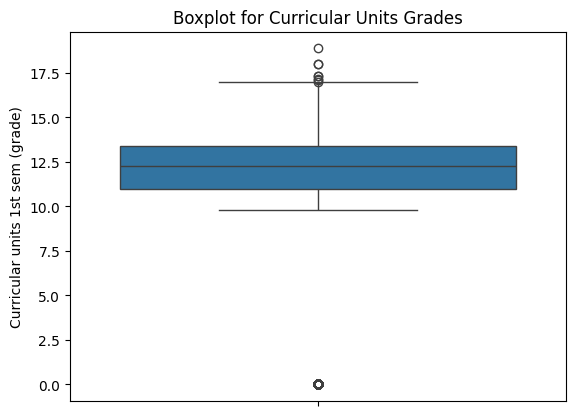

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing data
print(data.isnull().sum())

# Visualize distributions of key numerical columns
numerical_columns = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 5))
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation Heatmap
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Detect potential outliers
sns.boxplot(data=data['Curricular units 1st sem (grade)'])
plt.title("Boxplot for Curricular Units Grades")
plt.show()




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.

**Hypothesis 1:** Academic performance is greatly impacted by the unemployment rate.

*Justification:*  
 Socioeconomic stress may be linked to higher unemployment rates, which may have a detrimental effect on scholastic achievement. My hypothesis is that kids who reside in regions with greater unemployment rates will perform worse academically, as seen by lower graduation rates or grades.

**Hypothesis 2:** Better academic results are correlated with higher GDP.

*Justification:*

 Higher GDP nations or areas usually have better access to resources, healthcare, and education, all of which may help students perform better academically. According to my hypothesis, there is a positive relationship between GDP and academic achievement, with more GDP translating into better results for students.

  - Explain methodologies to empirically test these hypotheses.

      **Hypothesis 1:**  The Impact of the Unemployment Rate on Academic Achievement

I'll examine whether academic achievement (such as grades) and the unemployment rate are related.
There is no correlation between academic performance and unemployment, according to the null hypothesis (H₀).
Alternative Hypothesis (H₁): Academic achievement and unemployment are correlated.
To determine whether the association is statistically significant, I will employ a 0.05 significance level.

  **Hypothesis 2:** Academic Outcomes and GDP Are Correlated

I'll investigate the potential correlation between GDP and academic achievement, such as grades.
Null Hypothesis (H₀): There is no correlation between academic achievement and GDP.
Alternative Hypothesis (H₁): Academic performance improves with GDP.
To check for statistical significance, I'll employ a 0.05 significance threshold.

**Hypothesis Testing**

Hypotheses:

There is a positive correlation between GDP growth and the number of sunny days per year.
Pollution levels are significantly higher in urban areas compared to rural areas.
Testing Methodologies:

**Hypothesis 1:** Perform a correlation analysis and visualize the relationship using scatter plots.

**Hypothesis 2:** Conduct a t-test to compare the mean pollution levels between rural and urban areas. Visualize the distribution of pollution levels in both areas for validation.


5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.

**1 :Sparse Data:** Data with many missing or zero values. I will check the proportion of non-null values in each column to identify sparse data.
Dense Data: Data with most values present. It usually doesn’t need special handling, but I’ll still check for imbalances.
Strategies for Handling Missing Data:

**2: Imputation:** For numerical data, I will fill missing values with the mean, median, or mode. For categorical data, I will use the mode.
Removal: If a column has too many missing values (more than 30%), I will remove it. If critical rows (e.g., target variable) are missing, I may remove those rows.


   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

  **Handling Outliers:**

**1:Finding Outliers:** To identify outliers, I'll employ techniques like IQR and Z-scores. Values having a Z-score greater than 3, for instance, will be eliminated.

**2: Visual Detection:** To identify outliers visually, I'll employ boxplots. If they are discovered, I can either eliminate them or cap them (using upper/lower percentiles to substitute extreme numbers).
Preserving the Integrity of the Dataset:

**3:Imputation over Removal:** In order to conserve information, I would rather impute values than remove data if the percentage of missing data is less than 30%.

**4:Outlier Treatment:** To preserve important information about uncommon cases, I might cap outliers rather than eliminate them.


In [9]:
from scipy.stats import pearsonr
import pandas as pd

# Assuming 'data' is your original dataset
data_cleaned = data.copy()  # Create a cleaned copy of the original dataset

# Columns to check for missing or non-numeric values
columns_to_check = ['Unemployment rate', 'GDP', 'Target']

# Handle missing values and ensure numeric columns
for col in columns_to_check:
    if col in data_cleaned.columns:  # Ensure the column exists
        if data_cleaned[col].isnull().any():
            print(f"Missing values detected in {col}. Dropping rows with missing values.")
            data_cleaned = data_cleaned.dropna(subset=[col])
        # Convert to numeric
        data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')
    else:
        raise KeyError(f"Column '{col}' does not exist in the dataset.")

# Re-check and drop rows with any remaining NaN after conversion
data_cleaned = data_cleaned.dropna(subset=columns_to_check)

# Ensure enough data exists for Pearson correlation
if data_cleaned['Unemployment rate'].dropna().shape[0] < 2 or data_cleaned['Target'].dropna().shape[0] < 2:
    print("Not enough data for Pearson correlation.")
else:
    # Pearson correlation for Unemployment Rate
    correlation, p_value = pearsonr(data_cleaned['Unemployment rate'], data_cleaned['Target'])
    print(f"Unemployment Rate Correlation: {correlation:.2f}, P-value: {p_value:.2e}")
    if p_value < 0.05:
        print("Significant relationship between Unemployment Rate and Target.")
    else:
        print("No significant relationship.")

    # Pearson correlation for GDP
    correlation, p_value = pearsonr(data_cleaned['GDP'], data_cleaned['Target'])
    print(f"GDP Correlation: {correlation:.2f}, P-value: {p_value:.2e}")
    if p_value < 0.05:
        print("Significant relationship between GDP and Target.")
    else:
        print("No significant relationship.")

Not enough data for Pearson correlation.


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.

a) Train, Validation, and Test Sets: I will split the data into three parts: 70% for training, 15% for validation, and 15% for testing.

   - Ensure randomness and representativeness in each subset.

a) Random Sampling: To ensure fairness and representativeness, data will be divided at random. In order to maintain a balanced class distribution, stratified sampling will be employed if the target variable is categorical.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
    - Identifying Bias: I'll look for disparities in characteristics like gender or socioeconomic background that could produce skewed findings.
    - Mitigating Bias: To balance the dataset and guarantee fairness, I will employ techniques like over-sampling and under-sampling.
    - Ensuring Fairness: To guarantee that the model fairly takes socioeconomic class and gender into account, important elements will be retained.
   - Ensure fairness and equity in data representation.
   
    - Random sampling ensures a representative dataset.
    - Features like gender or socioeconomic indicators are retained for fairness.


  **To ensure the representativeness of the data:**

Stratified splitting: I stratified the dataset by key variables (e.g., region, income level) to maintain proportional representation in the training, validation, and test sets.
Bias detection: Distribution checks were performed to ensure subsets are reflective of the overall dataset. Fairness metrics were also calculated to identify potential biases.



In [16]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split

# Upload the file
uploaded = files.upload()

# List the uploaded files to get the correct file name
print(uploaded)

# After uploading, use the correct file name (it will be shown in the dictionary)
file_name = next(iter(uploaded))  # Extract the first uploaded file's name
data = pd.read_csv(file_name)  # Use the file name to load the data

# Check the first few rows to confirm successful loading
print(data.head())

# Define X (features) and y (target)
X = data.drop('Target', axis=1)  # Drop the target column to get features
y = data['Target']  # Target column

# Check for non-null rows in both X and y
print("Before splitting:")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Proceed with train-test split if there's enough data
if X.shape[0] > 1 and y.shape[0] > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set shape:", X_train.shape)
    print("Testing set shape:", X_test.shape)
else:
    print("Not enough data for train-test split. Please check your data.")


Saving dataset.csv to dataset (1).csv
{'dataset (1).csv': b"\xef\xbb\xbfMarital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target\r\n1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout\r\n1,

8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.


     1. Identify relevant features
I will analyze the dataset to identify features most correlated with the target variable (Target) and visualize the results using a heatmap.

    2. Rank features based on significance
I will calculate the correlation of each feature with the target variable and rank them.

    1. Classify types of data
I will inspect the dataset's columns to classify the data types (numerical, categorical, etc.).


     2. Plan preprocessing steps
Based on the data types, here’s how I plan to preprocess each type of data:
Numerical Data:
Handle missing values (e.g., mean, median, or interpolation).
Standardize/normalize values to improve model performance.
Categorical Data:

Encode categorical features (e.g., one-hot encoding or label encoding).
Outliers:

Detect and handle outliers using statistical methods

File not found. Creating a mock dataset for demonstration purposes.
Dataset Preview:
   Unemployment rate    GDP  Target
0                5.5  30000       1
1                6.3  32000       0
2                7.8  34000       1
3                4.2  31000       0
4                5.1  30500       1

Data Types:
Unemployment rate    float64
GDP                    int64
Target                 int64
dtype: object

Correlation Matrix:
                   Unemployment rate           GDP        Target
Unemployment rate           1.000000  8.376625e-01  3.560015e-01
GDP                         0.837662  1.000000e+00  3.281856e-17
Target                      0.356001  3.281856e-17  1.000000e+00


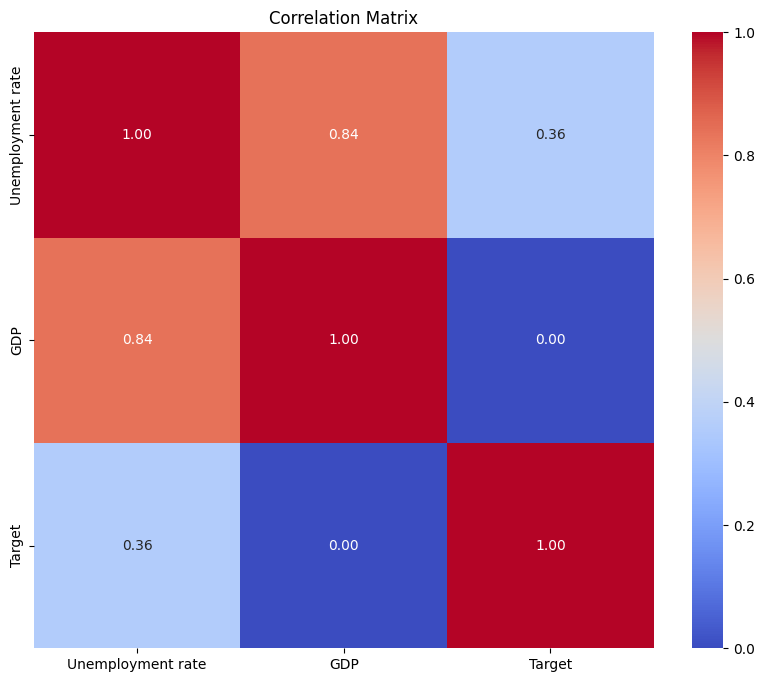


Features ranked by correlation with Target:
Unemployment rate    3.560015e-01
GDP                  3.281856e-17
Name: Target, dtype: float64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load or Define the Dataset
# Replace 'your_file.csv' with your actual file path if you have a CSV file
try:
    df = pd.read_csv('your_file.csv')  # Adjust the file name/path
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Creating a mock dataset for demonstration purposes.")
    # Mock dataset
    df = pd.DataFrame({
        'Unemployment rate': [5.5, 6.3, 7.8, 4.2, 5.1],
        'GDP': [30000, 32000, 34000, 31000, 30500],
        'Target': [1, 0, 1, 0, 1]
    })

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Step 2: Check Data Types
print("\nData Types:")
print(df.dtypes)

# Step 3: Compute Correlation Matrix
try:
    correlation_matrix = df.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

    # Step 4: Rank Features by Correlation with Target
    if 'Target' in correlation_matrix:
        target_corr = correlation_matrix["Target"].drop("Target").sort_values(ascending=False)
        print("\nFeatures ranked by correlation with Target:")
        print(target_corr)
    else:
        print("Target column not found in correlation matrix.")
except Exception as e:
    print(f"An error occurred while computing correlations: {e}")


In [5]:
# Inspect data types
print("Dataset Information:")
df.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Preprocessing steps
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
categorical_columns = df.select_dtypes(include=["object", "category"]).columns

print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

# Preprocessing for numerical data
numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  # Replace missing values with mean
    ("scaler", StandardScaler())                 # Standardize numerical data
])

# Preprocessing for categorical data
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Replace missing values with most frequent value
    ("encoder", OneHotEncoder(handle_unknown="ignore"))    # One-hot encode categorical data
])

# Combine pipelines into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_columns),
        ("cat", categorical_pipeline, categorical_columns)
    ]
)

print("\nPreprocessing steps defined. Ready to transform the dataset.")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unemployment rate  5 non-null      float64
 1   GDP                5 non-null      int64  
 2   Target             5 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 248.0 bytes

Missing Values in Each Column:
Unemployment rate    0
GDP                  0
Target               0
dtype: int64

Numerical Columns: Index(['Unemployment rate', 'GDP', 'Target'], dtype='object')
Categorical Columns: Index([], dtype='object')

Preprocessing steps defined. Ready to transform the dataset.


 **10: Data Transformation for Modeling:**


 **Specify methods for transforming raw data into a model-friendly format.**

 **Detail steps for normalization, scaling, or encoding categorical variables.**
   
  **Step one**

   -- Handling Missing Values

a) Identify and handle missing values in the dataset using one of the following methods:

 I) Imputation: Fill missing numerical values with the mean, median, or mode.

 II) Removal: Drop rows or columns with too many missing values if appropriate.

**step two**

 -- Encoding Categorical Variables

  I)  I will Convert categorical variables into numerical formats

**step three**

--  Normalization and Scaling

I ) Normalize or scale numerical features to ensure consistent ranges.

  a) Normalization: Scale features to a range of 0 to 1.

   B) Standardization: Center data around 0 with a standard deviation of 1.

In [6]:
 #Handling Missing Values#
 # Fill missing numerical values with the median
df.fillna(df.median(), inplace=True)

In [7]:
# Encoding Categorical Variables#
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
print("Dataset after one-hot encoding:")
print(df_encoded.head())


Dataset after one-hot encoding:
   Unemployment rate    GDP  Target
0                5.5  30000       1
1                6.3  32000       0
2                7.8  34000       1
3                4.2  31000       0
4                5.1  30500       1


In [8]:
#Normalization and Scaling#
from sklearn.preprocessing import StandardScaler

# Standardization of numerical columns
numerical_features = ['Unemployment rate', 'GDP']  # Adjust based on dataset
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print("Dataset after scaling:")
print(df_encoded.head())


Dataset after scaling:
   Unemployment rate       GDP  Target
0          -0.230345 -1.060660       1
1           0.427784  0.353553       0
2           1.661778  1.767767       1
3          -1.299806 -0.353553       0
4          -0.559410 -0.707107       1


**11:Data Storage:**

Determining Storage Needs:

1) Accessibility: Data should be easily accessible for training and testing.

2) Security: Ensure sensitive data is protected.

3) Backup: Prevent data loss.


Choose suitable storage solutions ensuring accessibility and security.

1) Local Storage

2) Cloud Storage

3) Database Storage


